## Group Report -  Is Your Startup Idea Actually Going to “Change the World”?
### DSCI 100, Session 002, 2023

 ***Members: Kaiser Ninomiya, Tracy Wu, Eddi Xie, Alayne Mariano***


           

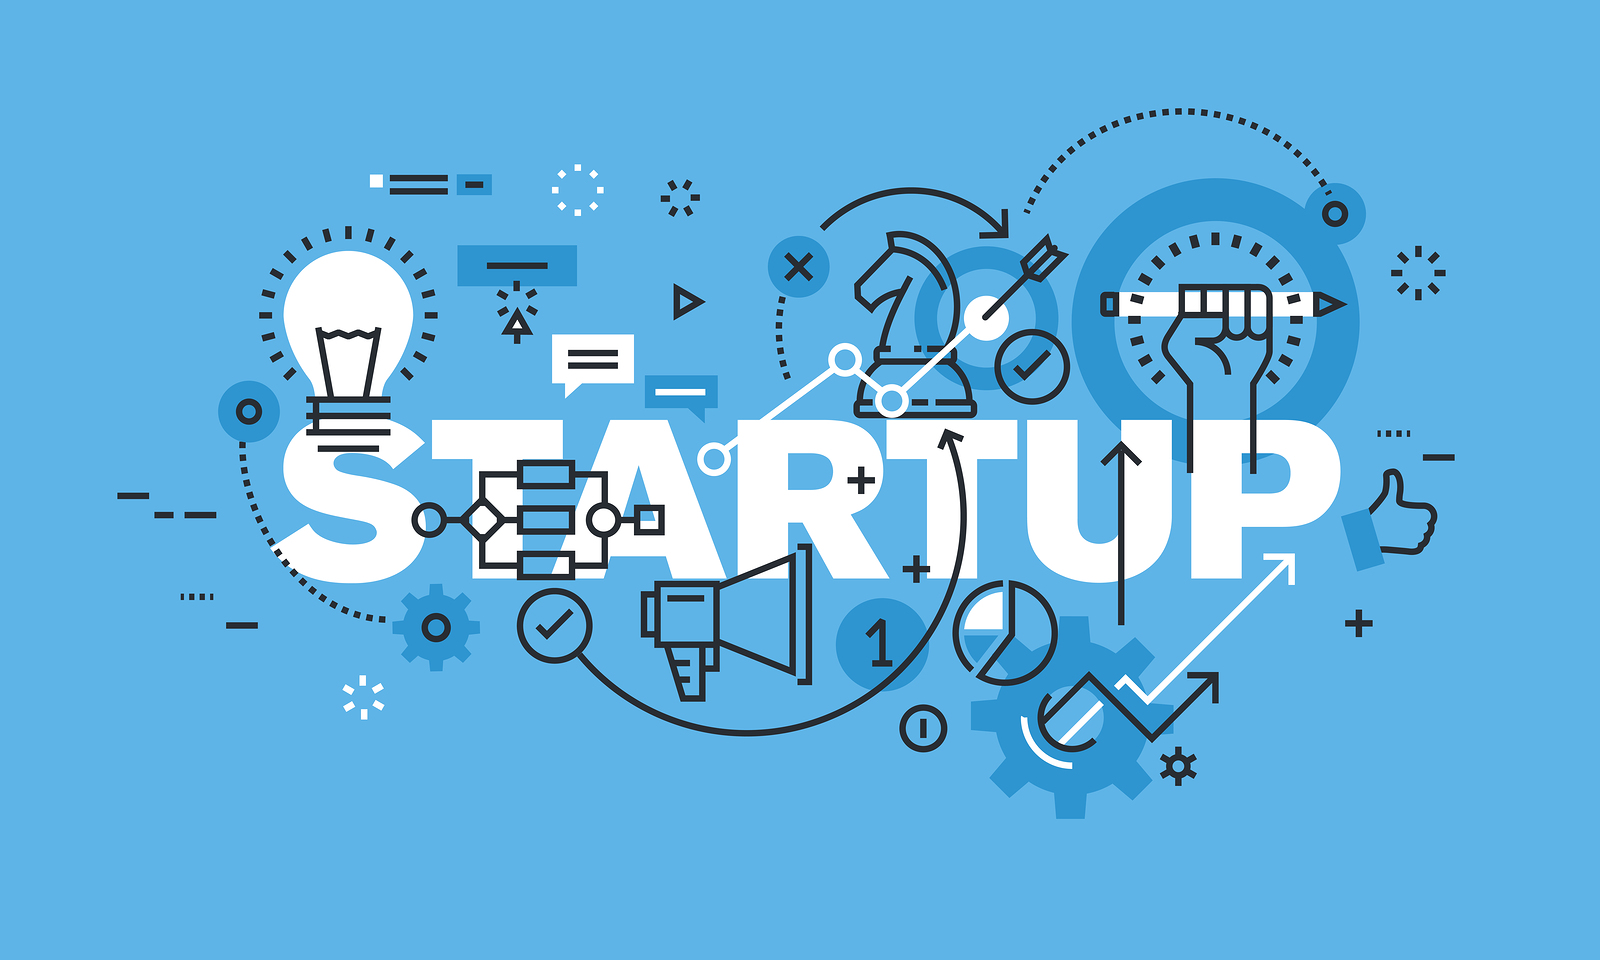

### Part 1 :INTRODUCTION: 

***400 words***

It’s an idea that’s been echoed throughout time by both the greatest and least minds, “This idea is going to change the world”. In the modern age, this statement translates into the tens of thousands of startups that break ground each year. But, is there a scientific way to determine whether a new startup will live up to this claim?

The aim of this model is to answer the question:
>**Can we predict the success or failure of a startup based on its market, location, and total investment funding?**

To do this, a model has been built to determine the success of an unknown startup from a database of over 17,000 datapoints *(Ball, 2021)* spanning from 1902 to 2013, which recorded several different vectors, such as geographic region, market sector. We have acquired this data set from Kaggle called “StartUp Investments (Crunchbase)”. In it, each observation shows the funds collected in each round, totalling up to the overall number of funding rounds each startup conducted. This comprehensive dataset spans throughout history and records several different vectors and thus is an effective source for the proposed model.

*Predictors:*
1. One of the most notable tenets of startup success seems to be **funding**. Startups rely heavily on investors and funding to build and expand the company. A large amount of capital provides the company the ability to keep building products and they use these funds to cover marketing, growth, and operating expenses. Therefore, the capacity to gain capital is significant for the success of a company.

2. In addition, industry, or **market**, has also been noted as another important factor in predicting the success of a startup. The impact and popularity of an industry is directly related to its profitability thus dictating how successful startups launched within that industry will be (Kaloferov, 2022).

3. Lastly, **country** is also a notable factor in predicting the success of a startup as industry popularity and the basal costs for launching a startup will differ between countries. For example, the rent for operational office headquarters in Japan will differ from average rent in the UK. Therefore, this model also takes into account the location in which each startup originated.

Finally, the model of vector-machine prediction has previously been applied in literature and has found to be successful in addition to being recommended for future similar analyses (Jongwoo et al., 2023).

### Part 2: METHODS AND RESULTS: (1500 words)

***Step 1: Installing and Loading the Packages***

The package "*psych*" allows us to modify categorical variables into "dummy code". Which in turn gets used in the "*caret*" package, allowing us to treat this dummy code as predictors by when using KNN classification.

In [ ]:
# Install "psych" package
install.packages("psych")

In [ ]:
# Loading the Libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(caret) 
library(caret)
library(class)
library(dplyr)
library(e1071)
library(psych)
# This is to limit the amount of rows shown when viewing dataframes to reduce clutter
options(repr.matrix.max.rows = 8) 

***Step 2: Load the dataset from Kaggle (Demonstrate that the dataset can be read from the web into R )***

In [3]:
# Reading Data
url <- "https://raw.githubusercontent.com/tracyw98/Project-Proposal-/main/investments_VC.csv"
startup_data <- read_csv(url)

# Investigate data
startup_data 

Rows: 54294 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): permalink, name, homepage_url, category_list, market, funding_tot...
dbl  (23): funding_rounds, founded_year, seed, venture, equity_crowdfunding,...
date  (3): founded_at, first_funding_at, last_funding_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,⋯,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,⋯,0,0,0,0,0,0,0,0,0,0
/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,⋯,0,0,0,0,0,0,0,0,0,0
/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NA,Tallinn,⋯,0,0,0,0,0,0,0,0,0,0
/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|iPhone|Apps|Mobile|iOS|E-Commerce|,Electronics,"15,00,000",operating,GBR,NA,London,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We can see that the dataframe has many "*NAs*" and unnecessary columns. We address these in step 3.

***Step 3: Wrangle the Data***

Upon initial examination of the raw dataset, it appears to meet the criteria for clean data. However, upon deeper analysis and consideration of our specific research question, we have identified certain columns that require further evaluation and formatting. These columns include: "market", "funding_total_usd", "country_code", and "status". Before proceeding with our analysis and visualization, it is crucial to ensure that these columns are appropriately formatted to facilitate the planned investigation. By taking the time to address these formatting considerations upfront, we can streamline our analysis process and enhance the efficiency of our research.


***Step 3.1: Previewing uncleaned data***

As we have seen above, there are many NAs we need to get rid of. The following code shows us just how much that exactly is.

In [4]:
# Determine if there are NAs in each column. 
missing_market <- startup_data |>
  select(market) |>
  group_by(market) |>
  summarise(count = n()) |>
  arrange(market)

missing_status <- startup_data |>
  select(status) |>
  group_by(status) |>
  summarise(count = n()) |>
  arrange(status)

missing_funding <- startup_data |>
  select(funding_total_usd) |>
  group_by(funding_total_usd) |>
  summarise(count = n()) |>
  arrange(funding_total_usd)

cat("Table 1: Summary of Missing Market\n")
missing_market 
cat("\nTable 2: Summary of Missing Status\n")
missing_status
cat("\nTable 3: Summary of Missing Funding\n")
missing_funding

Table 1: Summary of Missing Market


market,count
<chr>,<int>
3D,25
3D Printing,9
3D Technology,8
Accounting,18
⋮,⋮
World Domination,6
Writers,1
Young Adults,2
NA,8824



Table 2: Summary of Missing Status


status,count
<chr>,<int>
acquired,3692
closed,2603
operating,41829
NA,6170



Table 3: Summary of Missing Funding


funding_total_usd,count
<chr>,<int>
-,8531
1,1
"1,00,00,00,000",2
"1,00,00,000",489
⋮,⋮
"99,90,000",2
"99,99,997",1
"99,99,999",1
NA,4856


So, there are 8824, 6170, and 13387 (including "-") in the market, status, and fundin_total_usd variables respectively.

***Step 3.2: Formatting important columns for the planned analysis***

The original dataset entered “-” to represent zero funding acquired, meaning the startup had not acquired any funds. This symbol when processed by R coerced NA values into the data tibble and thus such NA values were omitted from the dataset via  `na.omit`. Secondly, the commas present in the original dataset didn’t align with the proper place value (eg. 19,00,000) therefore commas were then removed via the `gsub` function in order to accurately display `total_funding_usd`.

In addition, markets with an observation count under 100 were omitted from the analysis. Several market categories solely contain startups with the operating or acquired status. Because this analysis considered both statuses to define a successful startup in terms of results, in such cases regardless of the funding_total_usd entered into the model would return as a successful result in 100% of cases. 

For example, the market of Writers contains only one startup. Any unknown entered into the model under the market category Writers would always return as the status of that singular startup regardless of the funding_total_usd used to predict it. This wold make the model inaccurate and ineffective. Therefore, smaller markets were omitted to circumvent this issue

In [5]:
# Clean and wrangle your data into a tidy format, change status to a factor
clean_startup <- startup_data |>
    select(country_code, market,status, funding_total_usd)|>
    na.omit() |>
    mutate(status = as_factor(status))|>
    mutate(funding_total_usd = as.numeric(gsub(",", "", funding_total_usd))) |>
    mutate(funding_total_usd = as.numeric(gsub("-", "", funding_total_usd))) |>
    mutate(market = gsub(" ", "_", market)) |>
    na.omit()

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [6]:
# Double checking to see if there are any left over NAs from selected_column_2
check_for_nas <- clean_startup |>
  select(funding_total_usd) |>
  group_by(funding_total_usd) |>
  summarise(count = n()) |>
  arrange(desc(funding_total_usd))

cat("Table 4: Summary Count of Missing Values in 'funding_total_usd'\n")
check_for_nas

Table 4: Summary Count of Missing Values in 'funding_total_usd'


funding_total_usd,count
<dbl>,<int>
30079503000,1
5800000000,1
5700000000,1
3500000000,1
⋮,⋮
80,1
60,1
50,1
30,1


As we can see, there are no more "*NAs*" left :)

***Step 3.3: Include only Relevant Data***

There are many rows including data from markets and countries that only occur minimal times in our dataset. The small number of them also means a small reliability of the conclusions we can take using these data. For example, if the country "Antartica" only has one row of data and it happens to be that the company is acquired, this would likely skew all future model to have a 100% "acquire" prediction if it were to predict for a Antartican company. Therefore, we determine the top markets and countries with rows above a certain threshold, and filter all the other ones out.

In [7]:
# Determine the top markets
market_top <- clean_startup |>
    group_by(market) |>
    summarise(count = n()) |>
    filter(count > 100) |>
    pull(market)

# Determine the top countries
country_top <- clean_startup |>
    group_by(country_code) |>
    summarise(count = n()) |>
    filter(count > 100) |>
    pull(country_code)

# Filter for only the top markets and countries
clean_startup <- filter(clean_startup, market %in% market_top, country_code %in% country_top)


status_count <- clean_startup|>
    select(status)|>
    group_by(status) |>
   summarise(count = n()) |>
   arrange(status)

cat("Table 5:Clean Startup Data\n")
clean_startup
cat("Table 6: Summary of Status Count\n")
status_count 

Table 5:Clean Startup Data


country_code,market,status,funding_total_usd
<chr>,<chr>,<fct>,<dbl>
USA,News,acquired,1750000
USA,Games,operating,4000000
ARG,Advertising,closed,4912393
CHL,E-Commerce,operating,40000
⋮,⋮,⋮,⋮
USA,E-Commerce,operating,1510500
GBR,Education,operating,320000
CHN,Enterprise_Software,operating,1587301
USA,Enterprise_Software,operating,45000000


Table 6: Summary of Status Count


status,count
<fct>,<int>
acquired,2353
operating,21577
closed,1433


***Step 3.4: Summarize the Data to Report the Number of Observations in Each Variable***

This is so we can have an idea of the proportions in each variable.

In [8]:
# Summarizing the data to report the number of observations in each class

summary_market <- clean_startup |>
  select(market) |>
  group_by(market) |>
  summarise(count = n()) |>
  arrange(desc(count))

summary_status <- clean_startup |>
  select(status) |>
  group_by(status) |>
  summarise(count = n()) |>
  arrange(desc(count))

summary_funding <- clean_startup |>
  select(funding_total_usd) |>
  group_by(funding_total_usd) |>
  summarise(count = n()) |>
  arrange(desc(count))

summary_country <- clean_startup |>
  select(country_code) |>
  group_by(country_code) |>
  summarise(count = n()) |>
  arrange(desc(count))

cat("Table 7: Summary of Country Count\n")
summary_country
cat("\nTable 8: Summary of Market Count\n")
summary_market
cat("\nTable 9: Summary of Status Count\n")
summary_status
cat("\nTable 10: Summary of Funding Count\n")
summary_funding

Table 7: Summary of Country Count


country_code,count
<chr>,<int>
USA,17727
GBR,1633
CHN,834
CAN,797
⋮,⋮
BRA,114
BEL,103
DNK,103
ARG,73



Table 8: Summary of Market Count


market,count
<chr>,<int>
Software,3627
Biotechnology,3265
Mobile,1434
E-Commerce,1170
⋮,⋮
Nonprofits,108
Networking,107
Design,102
Startups,96



Table 9: Summary of Status Count


status,count
<fct>,<int>
operating,21577
acquired,2353
closed,1433



Table 10: Summary of Funding Count


funding_total_usd,count
<dbl>,<int>
1e+06,522
2e+06,398
5e+05,373
1e+05,363
⋮,⋮
2600000000,1
5700000000,1
5800000000,1
30079503000,1


From this we can see that the *USA* is by far the most reoccuring country, *Software* and *Biotechnology* are close in the lead for market, and *operating* is by a great deal the most prominent status.

***Step 3.5: Visualize the Data***

It is hard to really imagine the proportions just by some numbers in a table, only by visualizing it can we really gather some insights. Here we visualize our data to see if the percentage of acquired and closed companies in each of the top markets respectively. Combining both graphs into one was not possible due to arranging by “fill” not being possible. Therefore, we had to manually calculate the percentages first, then graph each status seperately. In addition, we would have liked to have a grouped bar chart but again due to arranging by fill not being possible, we were limited to the following:

`summarise()` has grouped output by 'market', 'status'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'country_code', 'status'. You can override
using the `.groups` argument.


Figure 1: Proportion of Closed Startups by Market


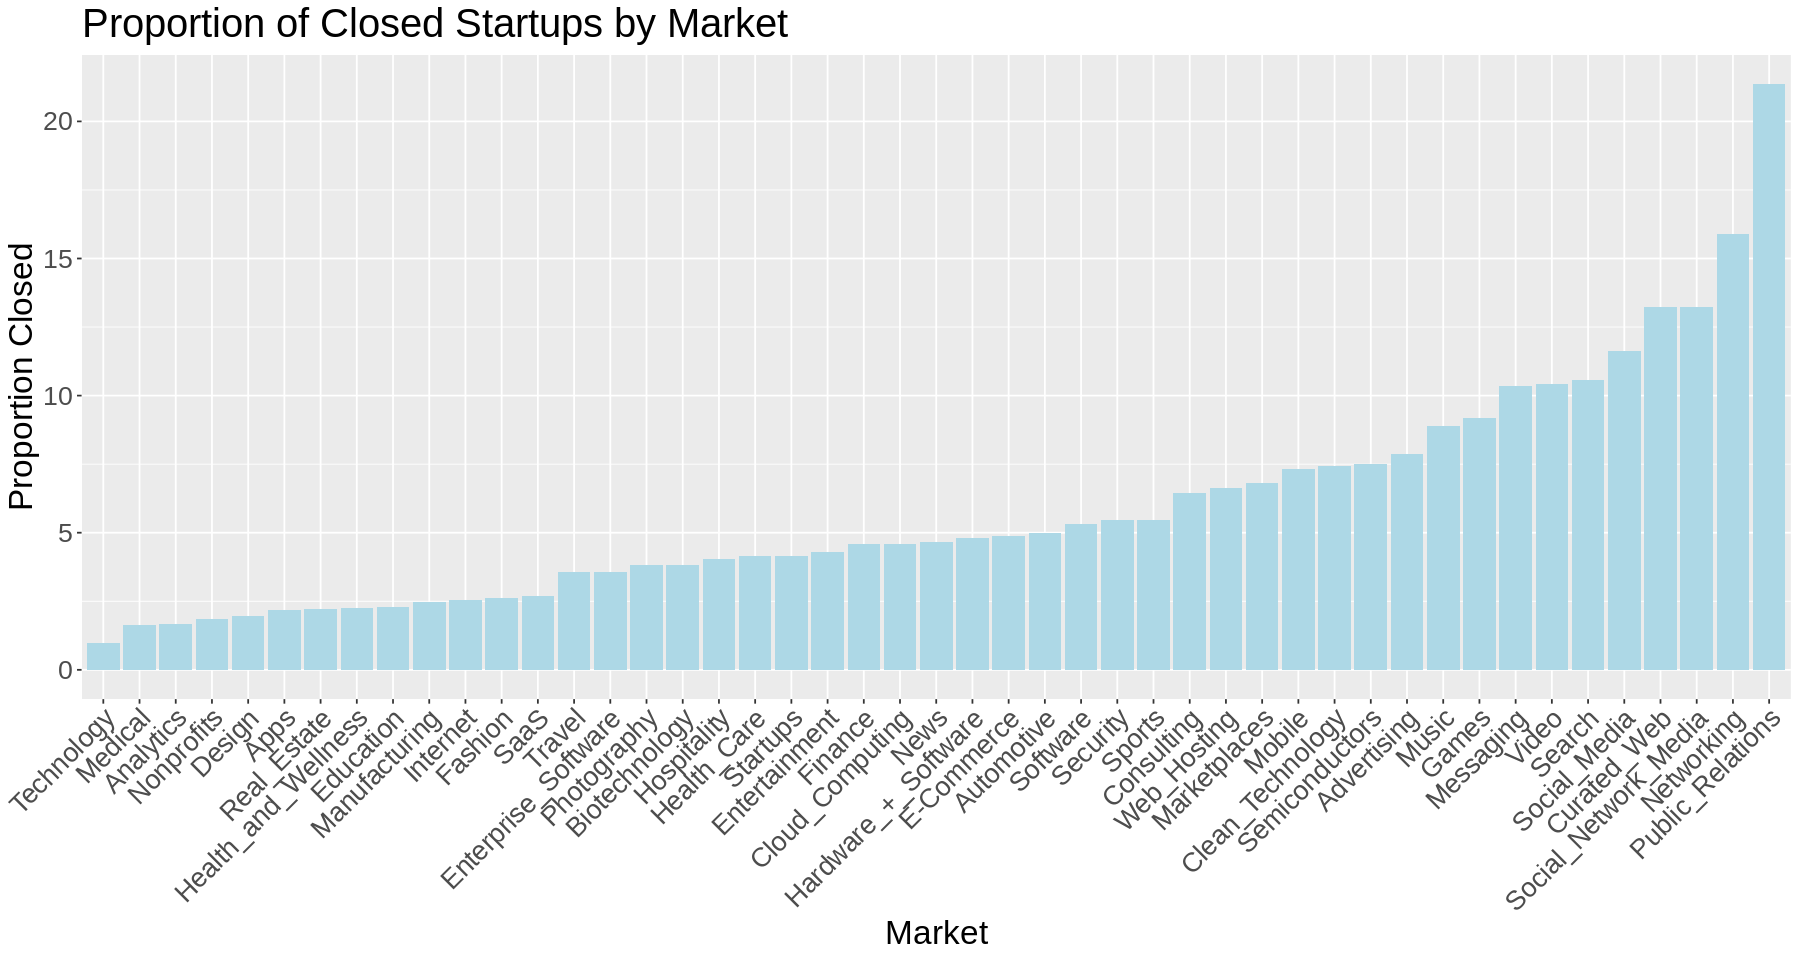

Figure 2: Proportion of Acquired Startups by Market


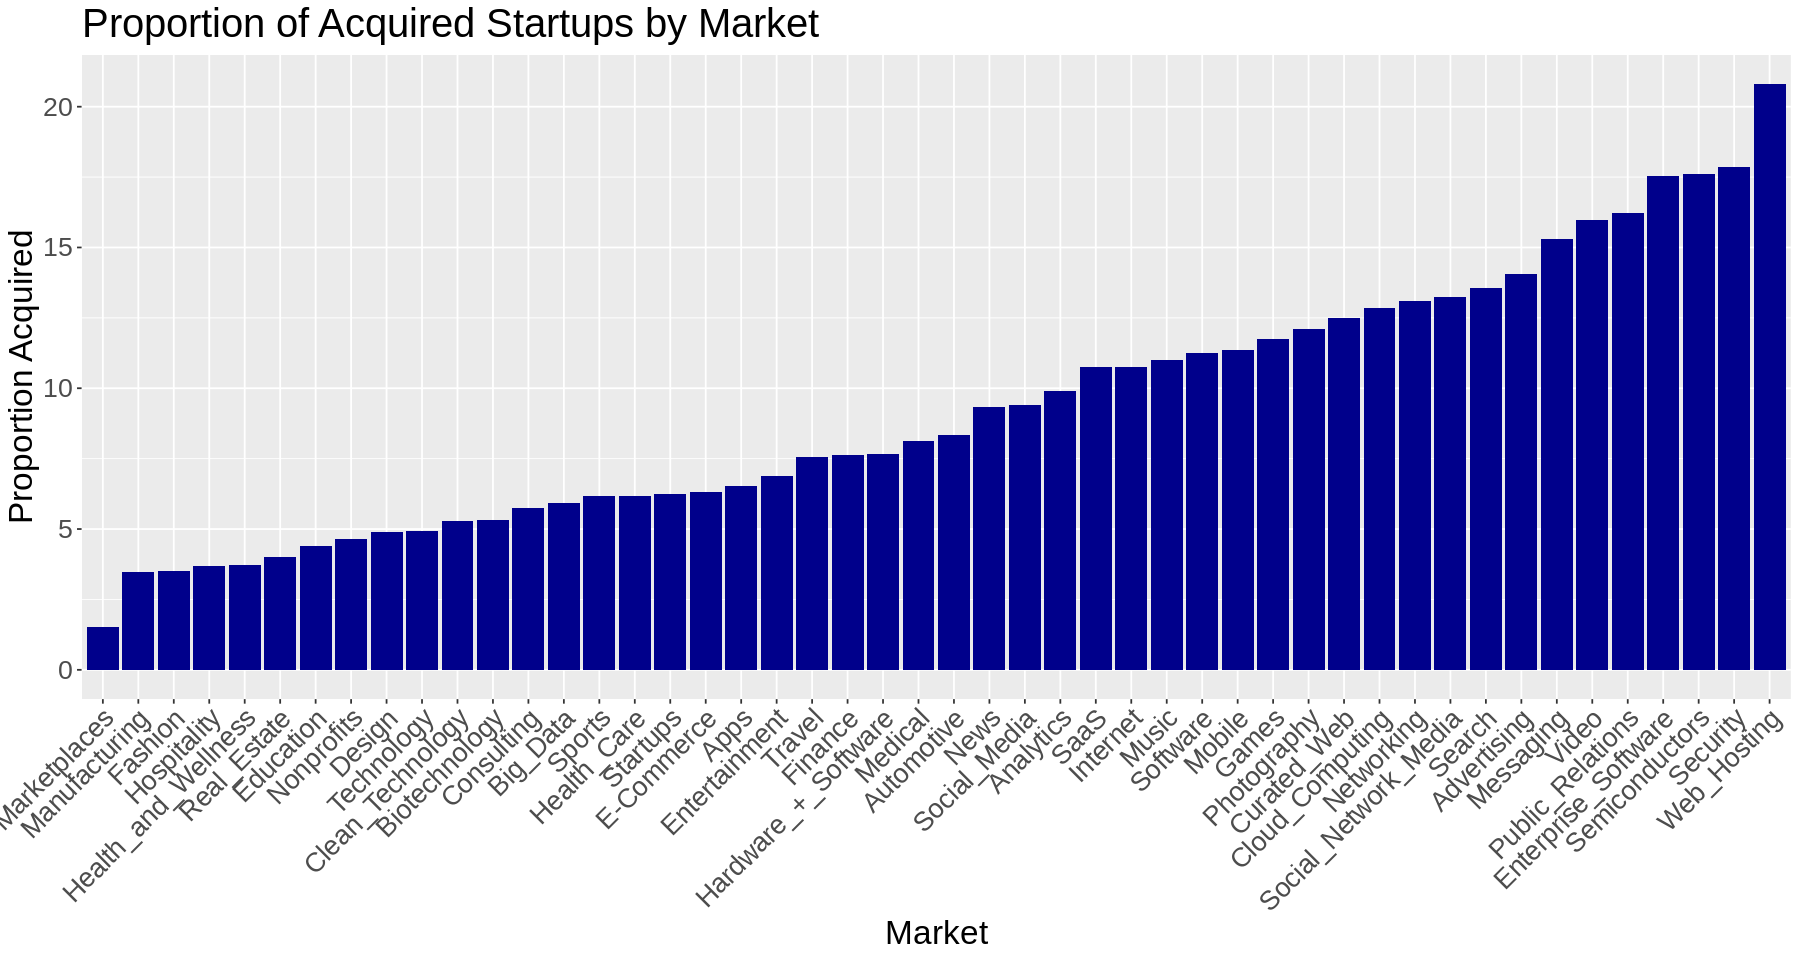

Figure 3: Proportion of Closed Startups by Country


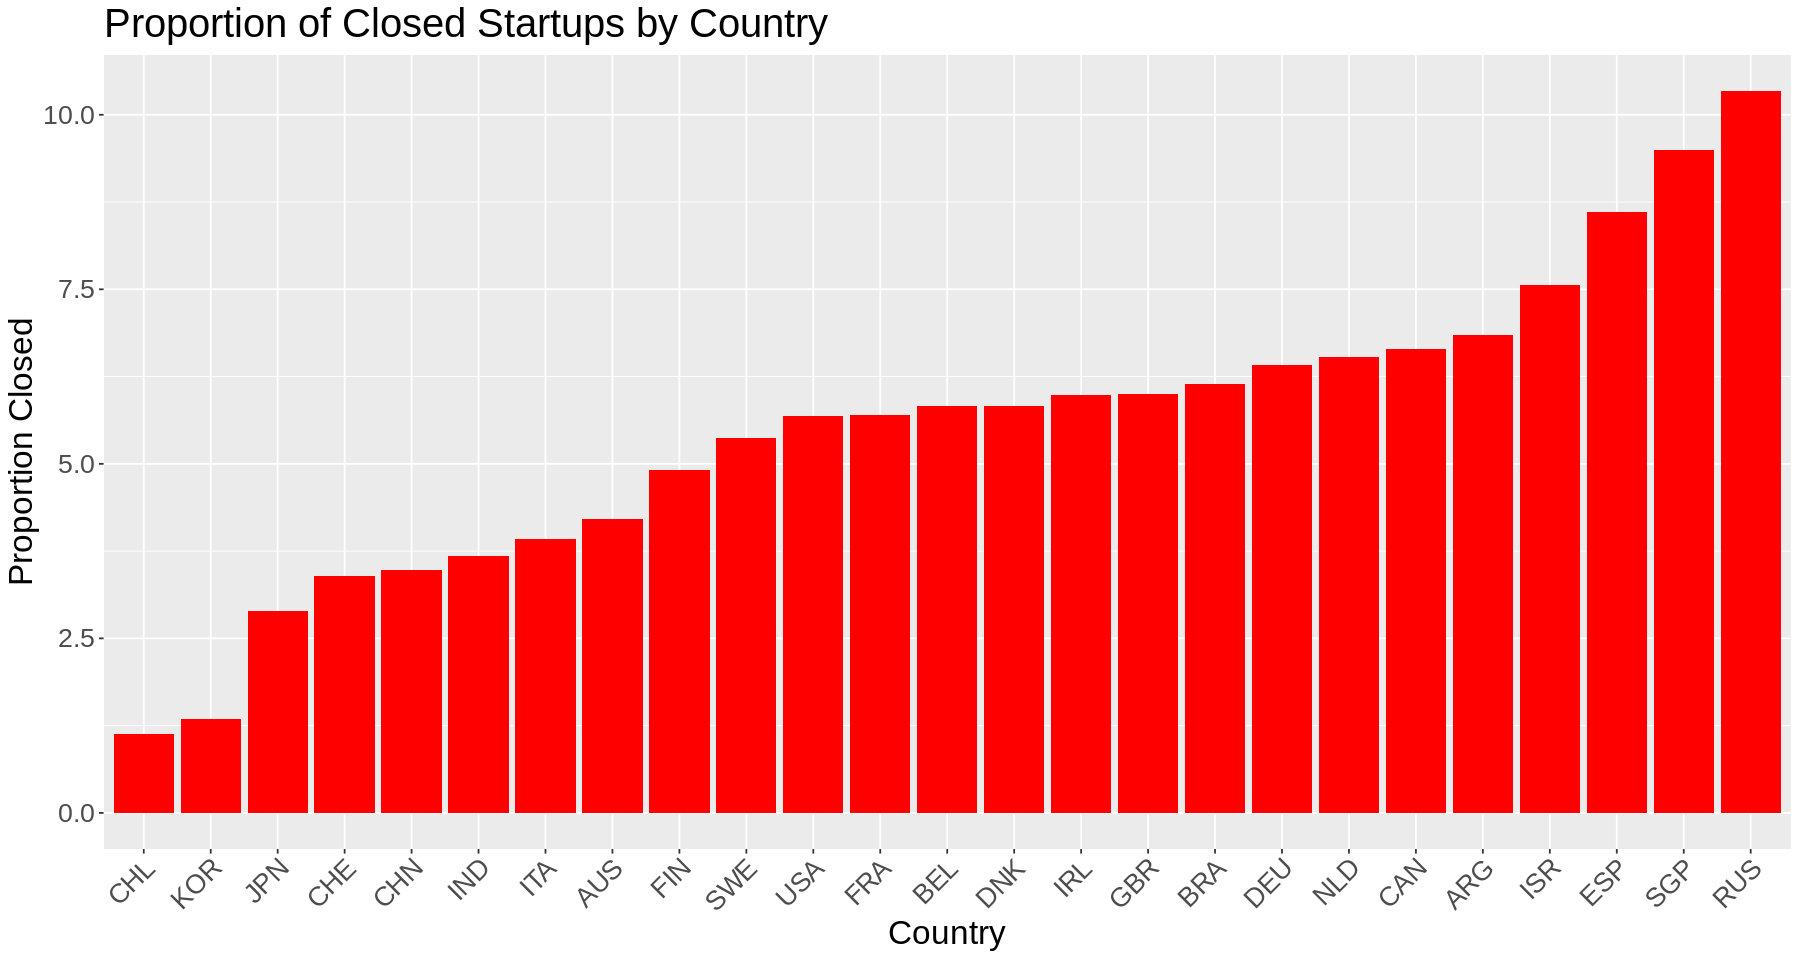

Figure 4: Proportion of Acquired Startups by Country


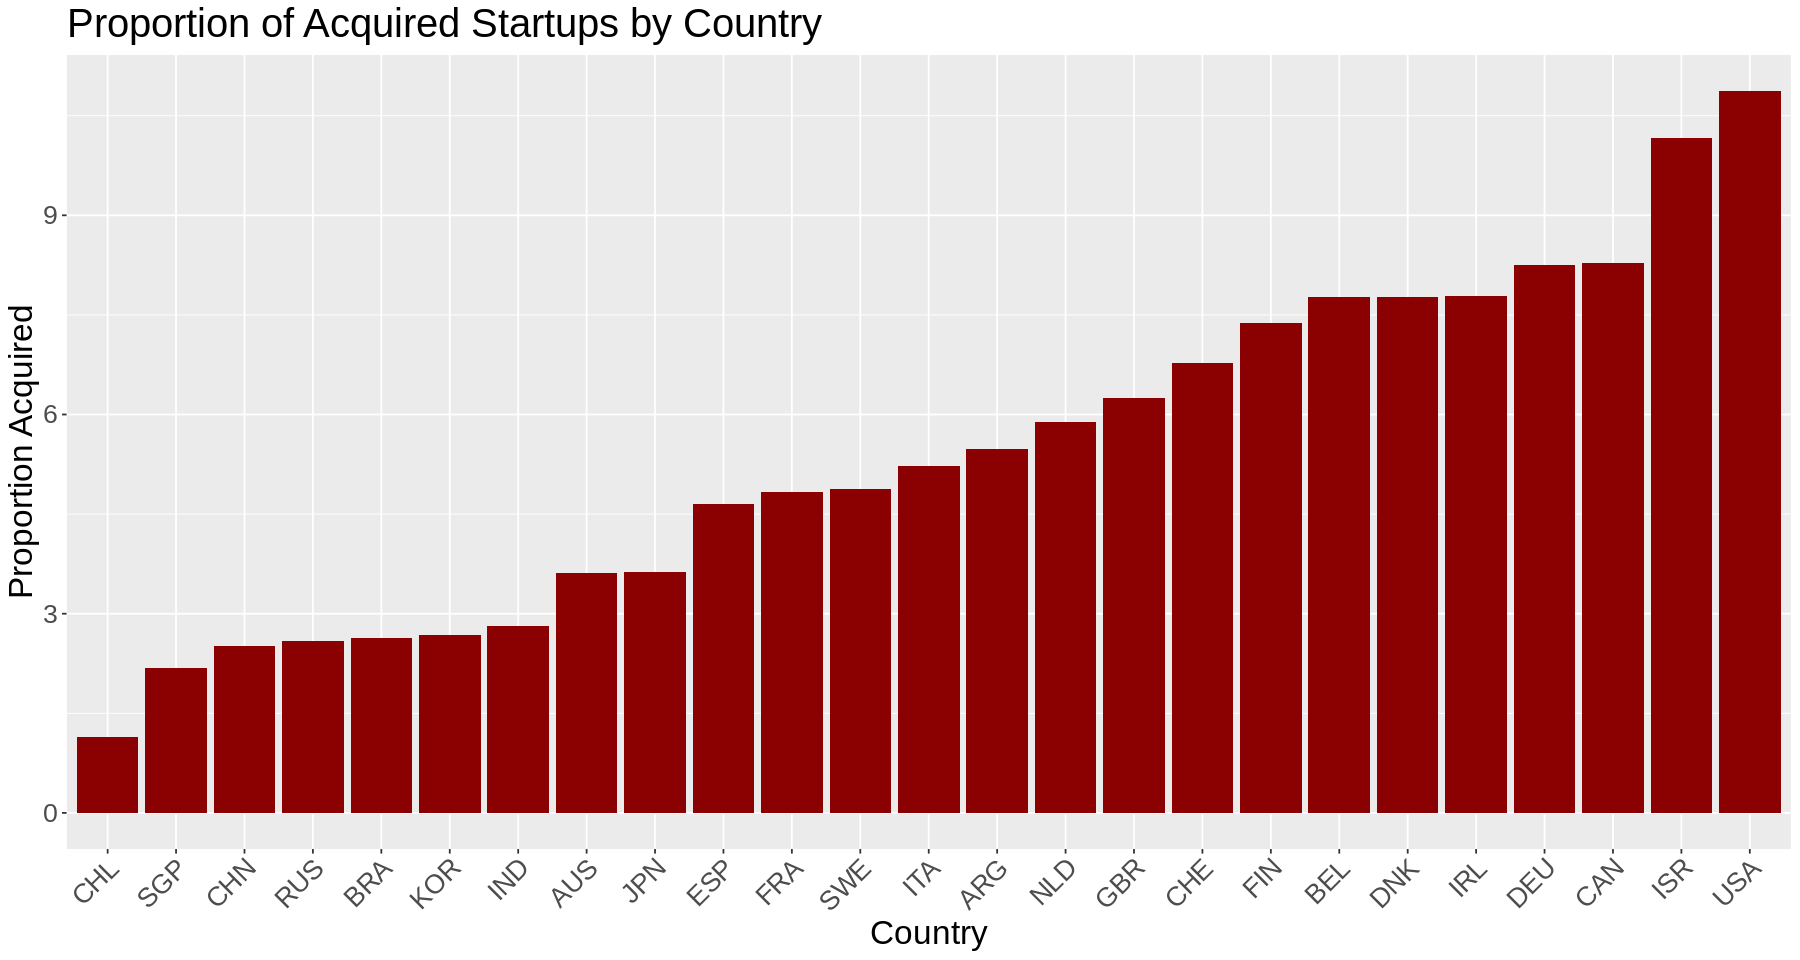

In [9]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Create the dataframe with a percentage column
vis_data_market <- clean_startup |>
    group_by(market) |>
    mutate(total = n()) |>
    group_by(market, status) |>
    mutate(total_in_market = n()) |>
    summarize(percentage = total_in_market / total * 100) |>
    distinct()

# Use the above dataframe to plot the graphs of the closed and acquired percentages
vis_closed_market <- vis_data_market |>
    filter(status == "closed") |>
    ggplot(aes(x = reorder(market, percentage), y = percentage)) +
    geom_bar(stat = "identity", fill = "lightblue") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(size = 20)) +
    labs(x = "Market", y = "Proportion Closed", fill = "Status",
        title = "Proportion of Closed Startups by Market")


vis_acquired_market <- vis_data_market |>
    filter(status == "acquired") |>
    ggplot(aes(x = reorder(market, percentage), y = percentage)) +
    geom_bar(stat = "identity", fill = "darkblue") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(size = 20)) +
    labs(x = "Market", y = "Proportion Acquired", fill = "Status",
        title = "Proportion of Acquired Startups by Market")


# Create the dataframe with a percentage column
vis_data_country <- clean_startup |>
    group_by(country_code) |>
    mutate(total = n()) |>
    group_by(country_code, status) |>
    mutate(total_in_country = n()) |>
    summarize(percentage = total_in_country / total * 100) |>
    distinct()

# Use the above dataframe to plot the graphs of the closed and acquired percentages
vis_closed_country <- vis_data_country |>
    filter(status == "closed") |>
    ggplot(aes(x = reorder(country_code, percentage), y = percentage)) +
    geom_bar(stat = "identity", fill = "red") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(size = 20)) +
    labs(x = "Country", y = "Proportion Closed", fill = "Status",
        title = "Proportion of Closed Startups by Country")


vis_acquired_country <- vis_data_country |>
    filter(status == "acquired") |>
    ggplot(aes(x = reorder(country_code, percentage), y = percentage)) +
    geom_bar(stat = "identity", fill = "darkred") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(size = 20)) +
    labs(x = "Country", y = "Proportion Acquired", fill = "Status",
        title = "Proportion of Acquired Startups by Country")

# Visualize
vis_closed_market
cat("Figure 1: Proportion of Closed Startups by Market\n")
vis_acquired_market
cat("Figure 2: Proportion of Acquired Startups by Market\n")
vis_closed_country
cat("Figure 3: Proportion of Closed Startups by Country\n")
vis_acquired_country
cat("Figure 4: Proportion of Acquired Startups by Country\n")

There are many things to intepret from the graphs. Although "*Public Relations*" seems to have a relatively high "*closed*" percentage, it also seems to have a relatively high "*acquired*" percentage, so it's high risk high reward. However, "*Web Hosting*" is a cut above the rest in terms of "*acquired*" percentage, and only has a slightly above average "*closed*" percentage. Therefore, it seems like "*Web Hosting*" should be a relatively safe bet.
For the countries, "*Chile*" has the lowest percentage in both categories, which means that many of the companies do not seem to find success nor failure, but are still operating. Furthermore, "*Russia*" seems to have a high failure rate and a low success rate, so starting a company in Russia seems to be a relatively worse decision according to this graph.

### Part 3: KNN-CLASSIFICATION: 

***Step 1: Determining datatypes***

We need to figure out what datatypes each variable is, with this knowledge we can ascertain if they are quantitative or qualitative. Knowing this will help us determine if we need to convert the variables into dummy code or not. k-NN involves calculating distances between datapoints, we must use numeric variables only. This only applies to the predictor variables. The outcome variable for k-NN classification should remain a factor variable.

In [10]:
# Determine the datatypes of the variables.
glimpse(clean_startup)

Rows: 25,363
Columns: 4
$ country_code      <chr> "USA", "USA", "ARG", "CHL", "USA", "GBR", "USA", "US…
$ market            <chr> "News", "Games", "Advertising", "E-Commerce", "Healt…
$ status            <fct> acquired, operating, closed, operating, operating, o…
$ funding_total_usd <dbl> 1750000, 4000000, 4912393, 40000, 1750000, 4400000, …


Since `funding_total_usd` is the only variable that is quantitative. We would need to convert the other variables into dummy code (except `status` since that is what we are predicting).

***Step 2: Scaling Variable(s)***

We need to scale our `funding_total_usd` variable.

In [11]:
clean_startup[, c("funding_total_usd")] <- scale(clean_startup[, c("funding_total_usd")])

cat("\nTable 11: Scaled Clean Startup \n")
clean_startup


Table 11: Scaled Clean Startup 


country_code,market,status,funding_total_usd
<chr>,<chr>,<fct>,<dbl>
USA,News,acquired,-0.07741752
USA,Games,operating,-0.06638292
ARG,Advertising,closed,-0.06190830
CHL,E-Commerce,operating,-0.08580382
⋮,⋮,⋮,⋮
USA,E-Commerce,operating,-0.07859210
GBR,Education,operating,-0.08443063
CHN,Enterprise_Software,operating,-0.07821544
USA,Enterprise_Software,operating,0.13469204


***Step 3: Converting Qualitative Variables into Dummy Code***

The reason we do dummy coding is because the classification model cannot use the *fct* or *chr* variables. Dummy coding converts these into ones and zeroes to and does this while retaining all the necessary information that the variables originally had. In short, it converts the variables into multiple binary variables. This is only possible with the `psych` package.

In [12]:
# Dummy code market and country_code
market <- as.data.frame(dummy.code(clean_startup$market))
country_code <- as.data.frame(dummy.code(clean_startup$country_code))

In [13]:
# Combine new dummy variables with original data set
clean_startup <- cbind(clean_startup, market, country_code)

In [14]:
# Remove original variables that had to be dummy coded
clean_startup <- clean_startup |>
    select(-one_of(c("market", "country_code")))

cat("\nTable 12: Dummy Code Clean Startup \n")
head(clean_startup)
glimpse(clean_startup)


Table 12: Dummy Code Clean Startup 


,status,funding_total_usd,Software,Biotechnology,Mobile,E-Commerce,Curated_Web,Enterprise_Software,Health_Care,Clean_Technology,⋯,KOR,JPN,SGP,FIN,CHE,RUS,BRA,BEL,DNK,ARG
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,acquired,-0.07741752,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,operating,-0.06638292,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,closed,-0.06190830,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
4,operating,-0.08580382,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,operating,-0.07741752,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,operating,-0.06442121,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Rows: 25,363
Columns: 75
$ status                <fct> acquired, operating, closed, operating, operatin…
$ funding_total_usd     <dbl> -0.07741752, -0.06638292, -0.06190830, -0.085803…
$ Software              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, …
$ Biotechnology         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, …
$ Mobile                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ `E-Commerce`          <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Curated_Web           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, …
$ Enterprise_Software   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Health_Care           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Clean_Technology      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ `Hardware_+_Software` <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Games                 <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Advertising  

As you can see all of the new variables contain only zeroes and ones now. It does mean we have a significant amount more columns now but this is all necessary for the model to work.

 In the provided code, the dummy.code() function is applied to the market and country_code variables in the clean_startup dataset. This creates new binary variables where each category is encoded as a separate variable. The value 1 is assigned to the dummy variable corresponding to the category to which an observation belongs, while the remaining dummy variables are set to 0. This encoding allows categorical information to be represented in a numerical format suitable for machine learning algorithms.




***Step 4: Splitting the Data into Testing and Training Data***

We need to split our dataset into two for *testing* and *training*, we partition 75% of the data into the training set and the remaining 25% into the test set. This allows us to train our model and test our model using the same original dataset without needing to access another dataset from another source. In addition, if we do not split our data and test our model using the same data as the training data, we would get skewed accuracies and results.

In [15]:
# Set the seed to make the partition reproducible
set.seed(1)

# Relocate the status variable to the first column position
clean_startup <- clean_startup |>
    relocate(status)

# 75% of the sample size
smp_size <- floor(0.75 * nrow(clean_startup))

train_ind <- sample(seq_len(nrow(clean_startup)), size = smp_size)

# creating test and training sets that contain all of the predictors
startup_train <- clean_startup[train_ind, ]
startup_test <- clean_startup[-train_ind, ]

cat("\nTable 13: Startup Training Data \n")
startup_train


Table 13: Startup Training Data 


,status,funding_total_usd,Software,Biotechnology,Mobile,E-Commerce,Curated_Web,Enterprise_Software,Health_Care,Clean_Technology,⋯,KOR,JPN,SGP,FIN,CHE,RUS,BRA,BEL,DNK,ARG
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17401,operating,-0.07815316,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
24388,operating,-0.08396550,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4775,operating,-0.08444043,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
13218,operating,0.07878339,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
17473,closed,-0.06638292,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1258,operating,-0.08580382,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
23697,operating,-0.08109572,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
24627,operating,0.77224679,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [16]:
# Split outcome variable into training and test sets using the same partition as above
status_predictors <- startup_train[, -1] |>
    data.matrix()
status_outcomes <- startup_train[, 1] |>
    data.matrix()
status_outcomes_test <- startup_test[, 1] |>
    as.factor()

***Step 5: Training our Model***

Now that all the prep work is done. We can finally train our model using our training set. Here we finally make use of the `caret` library. Notice that unlike knn-classification using `tidymodels` package, we do not need to cross validate to find a *K-value* as it automatically tunes our model and finds the best *K-value* for us.

In [ ]:
# Train model and choose K, select knn method
status_pred_caret <- train(status_predictors, status_outcomes, method = "knn", preProcess = c("center","scale"))
status_pred_caret

As the output very nicely stated for us. The chosen **K-value** is indeed **9**. We can further visualize and confirm this by plotting it:

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Plot the status_pred_caret object
plot(status_pred_caret, main = "KNN Model Performance", sub = "Figure 5 : KNN Model Performance")

***Step 6: Testing our Model***

And the moment we have all been waiting for... We can at last test the model using out testing set. To gather the metrics and results, we will use the `consusionMatrix` function.

In [ ]:
set.seed(1) # set the seed to make the partition reproducible
knnPredict <- predict(status_pred_caret, newdata = startup_test)
confusionMatrix(knnPredict, status_outcomes_test)

Although there are many metrics given here, the one we are most interested in is the "Accuracy". Which is a 0.847 or **84.7%**

***Step 7: Trying out our Model (again)***

Now that everything is done, we can actually try predicting the outcome of a completely new row or observation. Here we chose a `Software` company in `China` with a scaled `funding_total_usd` of `0.5`

In [ ]:
random_pred <- startup_train |>
    slice(1) |>
    mutate(funding_total_usd = 0.5) |>
    mutate(Software = 1) |>
    mutate(Biotechnology:Startups * 0) |>
    mutate(USA * 0, GBR * 0) |>
    mutate(CHN = 1) |>
    mutate(CAN:ARG * 0)

In [ ]:
set.seed(1) # set the seed to make the partition reproducible
knnPredict <- predict(status_pred_caret, newdata = random_pred)
knnPredict


It predicted that the company would be operating! Not too shabby.

### Part 4: DISCUSSION: 

***350 words***

By all standards, the model successfully predicted the status of a startup, whether closed, acquired, or operating. The final model was evaluated to have an 84.7% accuracy, defined as a largely accurate model. Therefore, it was concluded that the created model is an accurate predictor of the status of a startup, given the gross capital gained. When tested, the model accurately evaluated the status of a startup within the test set to be operational. 

It was expected that the model would be able to make a status prediction based on the categorical variables “market”, ” country,” and the continuous variable of total funding accrued. It was found that the model was indeed able to demonstrate this capability. This also demonstrates a strong relationship between the predictor variables and the response variable. This confirms the hypothesis that market and total funding, with consideration of the country for mechanics purposes, are fundamental tenets of a successful startup above all other variables (e.g. number of funding rounds). 

The model can predict the prospect of a startup given total funding and industry, thus defining these two variables as foremost above all other considerations. This conclusion supports the notion that these two variables should be noted when choosing to invest or launch a startup. 

Aside from contributions to financial concepts, the model is also able to predict the success of a startup based on estimated total funding and market. If a founder can present reasonable evidence for expected investments for their startup, this model can predict whether the startup will succeed. This would mean that given a larger dataset, the model could set benchmark numbers that a startup would need to meet to succeed, and this definitive model can contribute to the assessment of startups’ projected success.

Future questions to be analyzed in relation to the model would surround the idea of using the same predicting variables in a model that describes the success of a startup in a more definitive matter. For example, could a similar model be used to predict the gross or net profit of a startup in its first few years of operation? In this model, a successful startup was loosely defined as a startup that was still operational or had been acquired. However, the success of a startup cannot be solely attributed to its status–a limitation of the model. 

In a practical setting, the success of a startup is also defined by its profitability. Therefore, the future question would be using a similar model to predict profitability.


### Part 5: REFERENCES: 


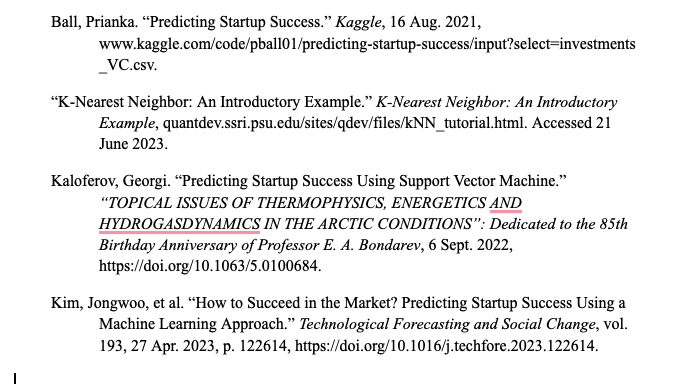



Ball, Prianka. “Predicting Startup Success.” Kaggle, 16 Aug. 2021,          www.kaggle.com/code/pball01/predicting-startup-success/input?select=investments_VC.csv. 

“K-Nearest Neighbor: An Introductory Example.” K-Nearest Neighbor: An Introductory Example,  quantdev.ssri.psu.edu/sites/qdev/files/kNN_tutorial.html. Accessed 21 June 2023. 

Kaloferov, Georgi. “Predicting Startup Success Using Support Vector Machine.” “TOPICAL ISSUES OF THERMOPHYSICS, ENERGETICS AND HYDROGASDYNAMICS IN THE ARCTIC CONDITIONS”: Dedicated to the 85th Birthday Anniversary of Professor E. A. Bondarev, 6 Sept. 2022, https://doi.org/10.1063/5.0100684. 

Kim, Jongwoo, et al. “How to Succeed in the Market? Predicting Startup Success Using a Machine Learning Approach.” Technological Forecasting and Social Change, vol. 193, 27 Apr. 2023, p. 122614, https://doi.org/10.1016/j.techfore.2023.122614. 